In [1]:
# BMI 데이터를 이용해서 Multinomial Classification을 구현해 보아요!
# sklearn과 tensorflow를 이용해서 구현할 꺼예요!

# 필요한 module import 

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats

from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

Matplotlib created a temporary config/cache directory at C:\Users\lee_0\AppData\Local\Temp\matplotlib-zy4ral5b because the default path (C:\Users\lee_0\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Raw Data Loading
df = pd.read_csv(r"C:\Users\lee_0\Desktop\코딩\ML\12.06\bmi.csv",
                 skiprows=3)
# display(df.head(), df.shape)  # (20000, 3)

# 결측치 확인 및 처리
# print(df.isnull().sum())  # 결측치는 없어요!

# 이상치 확인
zscore = 1.8
df.loc[np.abs(stats.zscore(df['height'])) >= zscore]  # height의 이상치 처리
df.loc[np.abs(stats.zscore(df['weight'])) >= zscore]  # weight의 이상치 처리
df.loc[np.abs(stats.zscore(df['label'])) >= zscore]  #label의 이상치 처리

x_data = df[['height', 'weight']].values  # 2차원 matrix
t_data = df['label']                              # 1차원 vector

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분할
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=0)

In [3]:
# sklearn으로 모델 학습하고 평가를 진행!
sklearn_model = linear_model.LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)

predict_value = sklearn_model.predict(x_data_test_norm)

# 평가는 accuracy로 평가할 꺼예요!
result = accuracy_score(t_data_test, predict_value)
print(result)  # 0.9851666666666666

# prediction 예측을 해 보아요!
height = 184
weight = 110
my_state = np.array([[height, weight]])
my_result = sklearn_model.predict(scaler.transform(my_state))
print(my_result)  # [2]

0.9851666666666666
[2]


In [6]:
# 데이터는 위에서 불러오고 전처리까지 진행이 끝났어요!

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(2,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(optimizer=Adam(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

keras_model.fit(x_data_train_norm,
                t_data_train,
                epochs=200,
                verbose=1,
                validation_split=0.2)

# learning_rate=1e-1
# loss: 0.4273 - acc: 0.9318 - val_loss: 0.0375 - val_acc: 0.9846

# learning_rate=1e-2
# loss: 0.1033 - acc: 0.9553 - val_loss: 0.1133 - val_acc: 0.9464

# learning_rate = 1e-4
# loss: 0.4016 - acc: 0.8069 - val_loss: 0.3792 - val_acc: 0.8179

Epoch 1/200
350/350 [==============================] - 1s 1ms/step - loss: 2.0686 - acc: 0.7007 - val_loss: 1.6002 - val_acc: 0.6371
Epoch 2/200
350/350 [==============================] - 0s 679us/step - loss: 0.9961 - acc: 0.7345 - val_loss: 0.4654 - val_acc: 0.8193
Epoch 3/200
350/350 [==============================] - 0s 694us/step - loss: 0.7411 - acc: 0.7711 - val_loss: 0.3397 - val_acc: 0.8443
Epoch 4/200
350/350 [==============================] - 0s 670us/step - loss: 0.6965 - acc: 0.7825 - val_loss: 0.3191 - val_acc: 0.8614
Epoch 5/200
350/350 [==============================] - 0s 624us/step - loss: 0.7285 - acc: 0.7944 - val_loss: 0.3948 - val_acc: 0.8761
Epoch 6/200
350/350 [==============================] - 0s 674us/step - loss: 0.6590 - acc: 0.8050 - val_loss: 0.6067 - val_acc: 0.7925
Epoch 7/200
350/350 [==============================] - 0s 698us/step - loss: 0.4907 - acc: 0.8273 - val_loss: 0.1676 - val_acc: 0.9268
Epoch 8/200
350/350 [==============================] - 0s

In [7]:
# Evaluation을 해야 해요!
model_eval = keras_model.evaluate(x_data_test_norm,
                                  t_data_test)
print(model_eval)  # [0.03814725577831268, 0.9838333129882812]

# prediction 예측을 해 보아요!
height = 184
weight = 110
my_state = np.array([[height, weight]])
my_result = keras_model.predict(scaler.transform(my_state))

188/188 [==============================] - 0s 638us/step - loss: 0.1790 - acc: 0.9558
[0.17895285785198212, 0.9558333158493042]


In [8]:
# 다른 예제를 구현해 보아요! (Iris-붓꽃예제, MNIST-손글씨숫자예제)
# 추가적으로 유용한 함수 하나 소개할꺼예요!
# 지금까지 우리가 evaluation할때 accuracy만 구했어요!
# 그런데 사실 presision, recall, f1과 같은 평가지표도 많이 사용되요!
# 예제로 알아보아요!

t_true = [0, 1, 2, 2, 2]
t_pred = [0, 0, 2, 2, 1]

label_names = ['thin', 'normal', 'fat']

print(classification_report(t_true, t_pred, target_names=label_names))

              precision    recall  f1-score   support

        thin       0.50      1.00      0.67         1
      normal       0.00      0.00      0.00         1
         fat       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



In [9]:
# Multinomial Classification (다중분류)
# 첫번째 예제는 BMI예제

# 두번째 예제는 Iris예제(붓꽃) 품종구별하는 예제!
# 붓꽃은 3가지 종이 있어요!
# setosa(세토사), versicolor(버시칼라), verginica(버지니카)
# 붓꽃의 꽃받침과 꽃잎의 길이와 너비에 따라서 품종이 결정되요!

# 데이터는 총 150개의 데이터가 있어요!
# 꽃받침(sepal), 꽃잎(petal)

from sklearn.datasets import load_iris

iris = load_iris()
# print(iris.data)  # x_data 즉, 꽃받침의 길이와 너비, 꽃잎의 길이와 너비
# print(iris.feature_names)  # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# print(iris.target)

df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# display(df)  # 150 rows × 4 columns

# 혹시 결측치가 존재하나요?
# df.isnull().sum()  # 결측치는 존재하지 않아요!

df['target'] = iris.target

# 중복행이 있을 수 있어요! 중복데이터가 있을 수 있어요!
df.duplicated().sum()
df = df.drop_duplicates()
# display(df)  # 149 rows × 5 columns

# display(df.corr())   # DataFrame을 이용한 상관관계분석

x_data = df.drop('target', axis=1, inplace=False).values
t_data = df['target'].values

# 이상치 체크도 해야해요...원래는 해야해요!
# 정규화 처리를 해야 해요!

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=1)

In [10]:
# 데이터셋이 준비되었으면 우리 Tensorflow Keras를 이용해서
# Multinomial Classification을 구현하고
# 모델 평가까지 진행해 보아요!

# 모델의 정확도까지 출력해보세요!
# 개별적으로 작성해 보세요!

keras_model = Sequential()

keras_model.add(Flatten(input_shape=(4,)))
keras_model.add(Dense(units=3,
                      activation='softmax'))

keras_model.compile(Adam(learning_rate=1e-1),
                    loss='sparse_categorical_crossentropy',
                    metrics=['acc'])

# history객체에 각 epoch당 발생되는 loss, acc, val_loss, val_acc를 저장
history = keras_model.fit(x_data_train_norm,
                          t_data_train,
                          epochs=500,
                          verbose=1,
                          validation_split=0.2)

# learning_rate=1e-1
# loss: 0.0847 - acc: 0.9518 - val_loss: 0.0288 - val_acc: 1.0000

Epoch 1/500
3/3 [==============================] - 0s 45ms/step - loss: 1.1607 - acc: 0.1928 - val_loss: 1.1366 - val_acc: 0.1905
Epoch 2/500
3/3 [==============================] - 0s 9ms/step - loss: 0.9911 - acc: 0.3614 - val_loss: 1.0078 - val_acc: 0.1905
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 0.8726 - acc: 0.5301 - val_loss: 0.8663 - val_acc: 0.6190
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 0.7621 - acc: 0.6747 - val_loss: 0.7533 - val_acc: 0.6667
Epoch 5/500
3/3 [==============================] - 0s 9ms/step - loss: 0.6769 - acc: 0.6747 - val_loss: 0.6530 - val_acc: 0.6667
Epoch 6/500
3/3 [==============================] - 0s 10ms/step - loss: 0.6102 - acc: 0.7349 - val_loss: 0.5759 - val_acc: 0.7143
Epoch 7/500
3/3 [==============================] - 0s 9ms/step - loss: 0.5610 - acc: 0.8434 - val_loss: 0.5247 - val_acc: 0.8095
Epoch 8/500
3/3 [==============================] - 0s 9ms/step - loss: 0.5229 - acc: 0.8554 - v

In [11]:
# Model Evaluation
print(keras_model.evaluate(x_data_test_norm,
                           t_data_test))
# [0.06694136559963226, 0.9555555582046509]

2/2 [==============================] - 0s 2ms/step - loss: 0.0647 - acc: 0.9778
[0.06474079936742783, 0.9777777791023254]


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


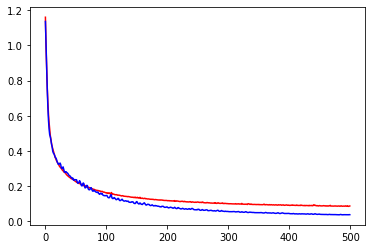

In [12]:
# 시각화를 해 보아요!
# 우리 모델이 overfitting이 발생하는지 그래프로 확인!
# history 객체가 가지고 있는 history 속성은 학습할 때 나온 데이터를 가지고 있어요
# dict로 가지고 있어요!

print(history.history.keys())

plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.show()